In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
music_sales_df = pd.read_csv('../data/Usable_Data/Usable_Music_Sales_Data.csv')

## Exploring and Analyzing Revenue data. 

In this notebook, I will create a filter to only Analyze data that pertains to music sales in terms of _revenue_. I will create visuals to look at revenue trends from 1973 to 2019. I will also look at these trends in terms of "Mode", so looking at revenues specifically from formats that are Analog, Digital, and Streaming.

In [3]:
music_sales_df.shape

(900, 5)

#### For sales revenue, we will have to look into the data of 'Value (Adjusted)' under the Metric column. This value is adjusted for inflation.

In [4]:
revenue_df = music_sales_df[music_sales_df['Metric']=='Value (Adjusted)']

In [5]:
revenue_df

,Format,Metric,Year,Actual_Value,Mode
464,8 - Track,Value (Adjusted),1973,2815.681824,Analog
465,8 - Track,Value (Adjusted),1974,2848.008609,Analog
466,8 - Track,Value (Adjusted),1975,2770.409498,Analog
467,8 - Track,Value (Adjusted),1976,3047.215772,Analog
468,8 - Track,Value (Adjusted),1977,3421.416287,Analog
...,...,...,...,...,...
895,Vinyl Single,Value (Adjusted),2015,6.205390,Analog
896,Vinyl Single,Value (Adjusted),2016,5.198931,Analog
897,Vinyl Single,Value (Adjusted),2017,6.339678,Analog
898,Vinyl Single,Value (Adjusted),2018,5.386197,Analog


In [6]:
revenue_df['Format'].unique()

array(['8 - Track', 'CD', 'CD Single', 'Cassette', 'Cassette Single',
       'DVD Audio', 'Download Album', 'Download Music Video',
       'Download Single', 'Kiosk', 'LP/EP',
       'Limited Tier Paid Subscription', 'Music Video (Physical)',
       'On-Demand Streaming (Ad-Supported)',
       'Other Ad-Supported Streaming', 'Other Digital', 'Other Tapes',
       'Paid Subscription', 'Ringtones & Ringbacks', 'SACD',
       'SoundExchange Distributions', 'Synchronization', 'Vinyl Single'],
      dtype=object)

In [7]:
revenue_df['Metric'].unique()

array(['Value (Adjusted)'], dtype=object)

#### As with volume, we will look into how sales in revenue have changed throughout the years.

In [8]:
revenue_df = revenue_df.astype({"Year":'str'})

In [9]:
revenue_by_year = revenue_df.groupby(['Year','Metric'])['Actual_Value'].sum()

<AxesSubplot:title={'center':'U.S. Recorded Music Revenues (Adjusted for Inflation)'}, xlabel='Year', ylabel='$ (Millions)'>

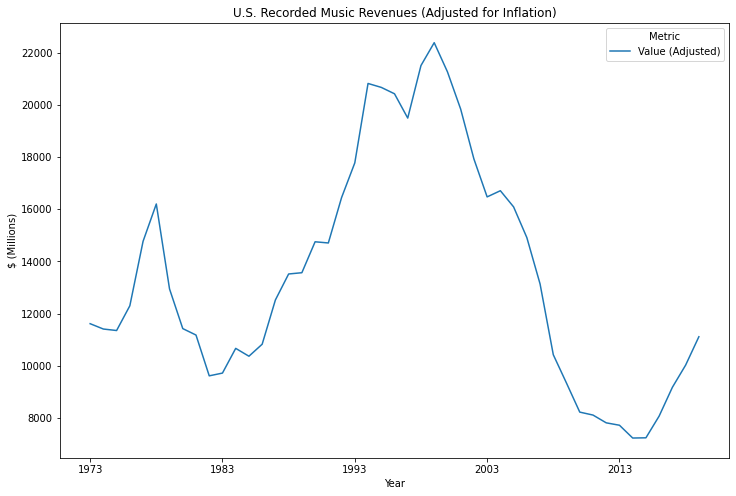

In [10]:
revenue_by_year.unstack().plot(figsize=(12,8), title=("U.S. Recorded Music Revenues (Adjusted for Inflation)"),
                              ylabel=("$ (Millions)"))

In [11]:
revenue_df['Year'].unique()

array(['1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype=object)

[Text(0, 0, '1973'),
 Text(1, 0, '1974'),
 Text(2, 0, '1975'),
 Text(3, 0, '1976'),
 Text(4, 0, '1977'),
 Text(5, 0, '1978'),
 Text(6, 0, '1979'),
 Text(7, 0, '1980'),
 Text(8, 0, '1981'),
 Text(9, 0, '1982'),
 Text(10, 0, '1983'),
 Text(11, 0, '1984'),
 Text(12, 0, '1985'),
 Text(13, 0, '1986'),
 Text(14, 0, '1987'),
 Text(15, 0, '1988'),
 Text(16, 0, '1989'),
 Text(17, 0, '1990'),
 Text(18, 0, '1991'),
 Text(19, 0, '1992'),
 Text(20, 0, '1993'),
 Text(21, 0, '1994'),
 Text(22, 0, '1995'),
 Text(23, 0, '1996'),
 Text(24, 0, '1997'),
 Text(25, 0, '1998'),
 Text(26, 0, '1999'),
 Text(27, 0, '2000'),
 Text(28, 0, '2001'),
 Text(29, 0, '2002'),
 Text(30, 0, '2003'),
 Text(31, 0, '2004'),
 Text(32, 0, '2005'),
 Text(33, 0, '2006'),
 Text(34, 0, '2007'),
 Text(35, 0, '2008'),
 Text(36, 0, '2009'),
 Text(37, 0, '2010'),
 Text(38, 0, '2011'),
 Text(39, 0, '2012'),
 Text(40, 0, '2013'),
 Text(41, 0, '2014'),
 Text(42, 0, '2015'),
 Text(43, 0, '2016'),
 Text(44, 0, '2017'),
 Text(45, 0, '2018')

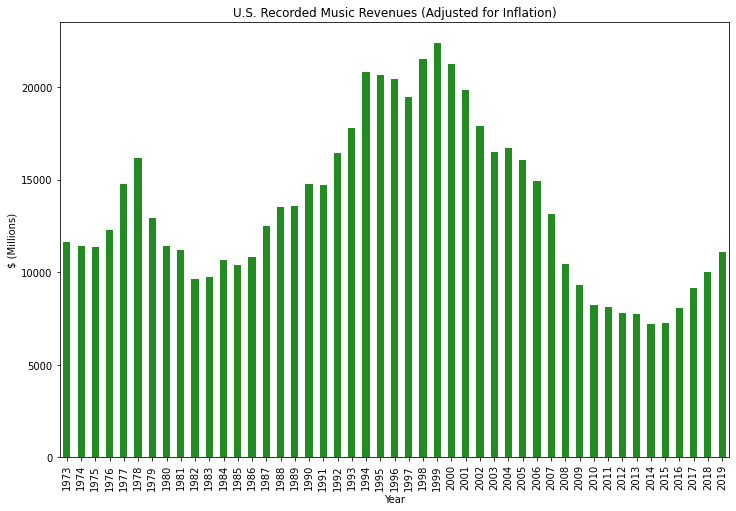

In [12]:
ax = revenue_by_year.plot(kind='bar',figsize=(12,8), title=("U.S. Recorded Music Revenues (Adjusted for Inflation)"),
                              ylabel=("$ (Millions)"), xlabel=("Year"), color="#228B22")
ax.set_xticklabels(['1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'])

In [13]:
digital_download_df = revenue_df[revenue_df['Format']=='Download Album']

In [14]:
digital_download_df.head(5)

,Format,Metric,Year,Actual_Value,Mode
614,Download Album,Value (Adjusted),2004,61.579637,Digital
615,Download Album,Value (Adjusted),2005,177.637762,Digital
616,Download Album,Value (Adjusted),2006,349.879793,Digital
617,Download Album,Value (Adjusted),2007,613.428808,Digital
618,Download Album,Value (Adjusted),2008,754.373567,Digital


In [15]:
CD_sales_df = revenue_df[revenue_df['Format']=='CD']

In [16]:
CD_sales_df.head(5)

,Format,Metric,Year,Actual_Value,Mode
474,CD,Value (Adjusted),1983,44.149602,Digital
475,CD,Value (Adjusted),1984,254.180636,Digital
476,CD,Value (Adjusted),1985,925.449828,Digital
477,CD,Value (Adjusted),1986,2169.585545,Digital
478,CD,Value (Adjusted),1987,3586.399606,Digital


## With the visual above, we can see that there have been dramatic changes to music sales revenue throughout the years. Revenues started increasing in the early 1980s, which is when CDs were introduced. Then, revenue began to fall in the early 2000s, when digital downloads became more prevalent. 

## This is interesting because the early 2000s is when sales _volume_ began to rise. This indicates that even though digital downloads made music more available to listeners, it made it less profitable to the music industry. However, revenue has been slowly increasing since 2015, presumably when streaming began to grow in popularity.

## Now we will look at how revenues have changed based on Mode: digital, analog, and streaming. Streaming should have a greater impact in sales revenue than it had in sales volume.

In [17]:
revenue_by_mode = revenue_df.groupby(['Year','Mode'])['Actual_Value'].sum()

<AxesSubplot:title={'center':'U.S. Recorded Music Sales Revenues by Mode'}, xlabel='Year', ylabel='$ (Millions)'>

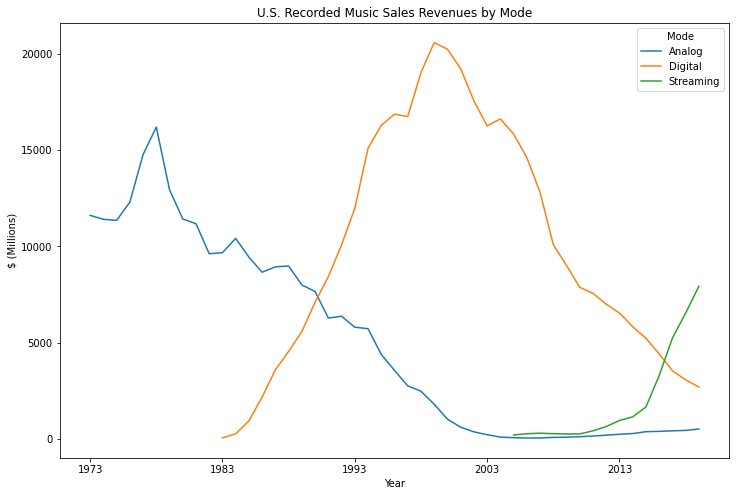

In [18]:
revenue_by_mode.unstack().plot(figsize=(12,8), title=("U.S. Recorded Music Sales Revenues by Mode"),
                              ylabel=("$ (Millions)"))

## With this plot, we can see that digital contributed a lot to sales when the digital content was sold in physical formats (such as CDs). As soon as digital downloads became more prevalent, however, digital music's profitability dramatically decreased. The rising popularity of streaming has led to increases in revenue. After 2015, streaming is the mode that contributes most revenue to the music industry.